In [6]:
import pandas as pd
data = pd.read_csv("phase2_results/new_60.csv")
print(data)

    instance  bks     nbh  time      seed  makespan
0       X6_8  147    swap    60   8948803       151
1       X6_8  147    swap    60   9459607       151
2       X6_8  147    swap    60  40594335       151
3       X6_8  147    swap    60  41299189       151
4       X6_8  147    swap    60  55911072       152
..       ...  ...     ...   ...       ...       ...
395    X59_3  108  random    60  59528639       109
396    X59_3  108  random    60  61045676       109
397    X59_3  108  random    60  81907177       109
398    X59_3  108  random    60  84183543       109
399    X59_3  108  random    60  85838798       109

[400 rows x 6 columns]


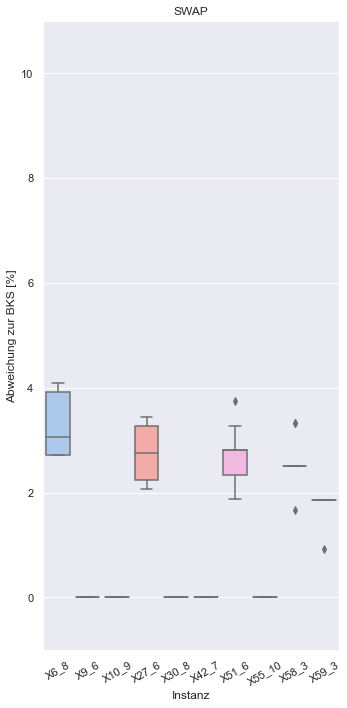

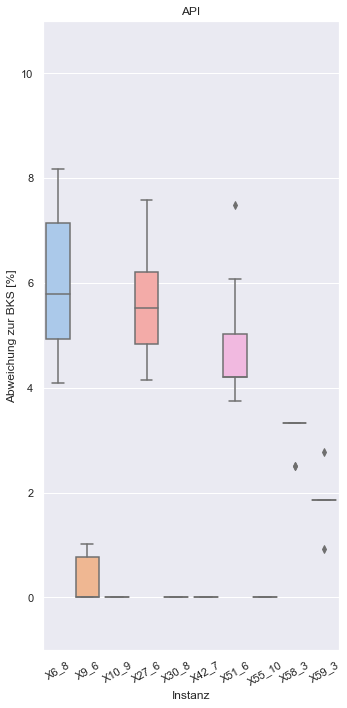

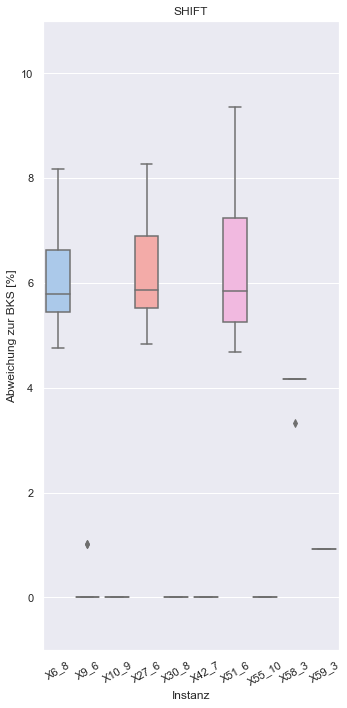

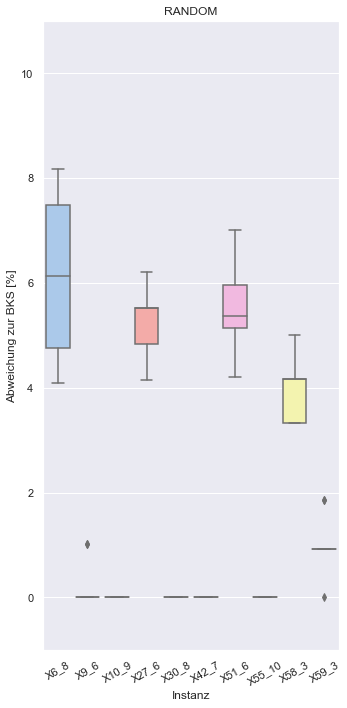

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


for nbh in ["swap","api","shift","random"]:
    d = data.loc[data["nbh"] == nbh]
    # print(d.head())

    fig, ax = plt.subplots(figsize=(10,10))
    sns.set_theme()
    sns.set_palette("pastel")

    sns.boxplot(ax=ax, x=d.instance,  y=(d.makespan/data.bks - 1) * 100)
    ax.set(title=nbh.upper(), xlabel="Instanz", ylabel="Abweichung zur BKS [%]", ylim=(-1,11))

    # sns.scatterplot(ax=ax, x=d.instance,  y=d.bks, s=100)
    # sns.boxplot(ax=ax, x=d.instance,  y=d.makespan)
    # ax.set(title=nbh.upper(), xlabel="Instanz", ylabel="Abweichung zur BKS [%]")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.tight_layout()

